In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import os

In [2]:
base_dir = 'cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [7]:
model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(lr=0.001),
             metrics=['acc'])

c:\github\python\lecture\venv\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [8]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_steps=50,
                              verbose=1)

Epoch 1/100
100/100 [==============================] - 27s 209ms/step - loss: 0.7843 - acc: 0.5155 - val_loss: 0.6728 - val_acc: 0.6310
Epoch 2/100
100/100 [==============================] - 10s 102ms/step - loss: 0.6797 - acc: 0.5815 - val_loss: 0.6445 - val_acc: 0.6560
Epoch 3/100
100/100 [==============================] - 10s 103ms/step - loss: 0.6549 - acc: 0.6145 - val_loss: 0.6132 - val_acc: 0.6450
Epoch 4/100
100/100 [==============================] - 11s 106ms/step - loss: 0.6424 - acc: 0.6415 - val_loss: 0.6997 - val_acc: 0.5860
Epoch 5/100
100/100 [==============================] - 11s 106ms/step - loss: 0.6291 - acc: 0.6540 - val_loss: 0.5770 - val_acc: 0.6810
Epoch 6/100
100/100 [==============================] - 10s 102ms/step - loss: 0.6148 - acc: 0.6715 - val_loss: 0.5677 - val_acc: 0.7000
Epoch 7/100
100/100 [==============================] - 10s 102ms/step - loss: 0.6106 - acc: 0.6645 - val_loss: 0.6079 - val_acc: 0.6350
Epoch 8/100
100/100 [===========================

100/100 [==============================] - 10s 102ms/step - loss: 0.4964 - acc: 0.7690 - val_loss: 0.4475 - val_acc: 0.7840
Epoch 61/100
100/100 [==============================] - 10s 103ms/step - loss: 0.4808 - acc: 0.7720 - val_loss: 0.4888 - val_acc: 0.7780
Epoch 62/100
100/100 [==============================] - 10s 102ms/step - loss: 0.4643 - acc: 0.7800 - val_loss: 0.5337 - val_acc: 0.7800
Epoch 63/100
100/100 [==============================] - 10s 104ms/step - loss: 0.4919 - acc: 0.7805 - val_loss: 0.6088 - val_acc: 0.7460
Epoch 64/100
100/100 [==============================] - 10s 103ms/step - loss: 0.4767 - acc: 0.7815 - val_loss: 0.4444 - val_acc: 0.7890s - ETA: 1s - loss: 0.4755 - acc: 0.78 - ETA: 1s - loss: 0.4754 - acc: 0 - ETA: 1s - loss: 0.4759 -
Epoch 65/100
100/100 [==============================] - 10s 104ms/step - loss: 0.4642 - acc: 0.7820 - val_loss: 0.4632 - val_acc: 0.7920
Epoch 66/100
100/100 [==============================] - 10s 102ms/step - loss: 0.4678 - acc:

Text(0.5, 1.0, 'Training and validation loss')

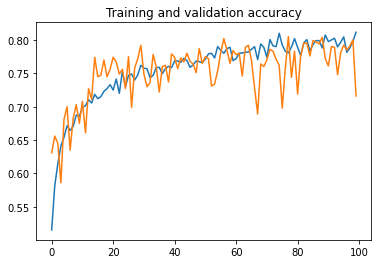

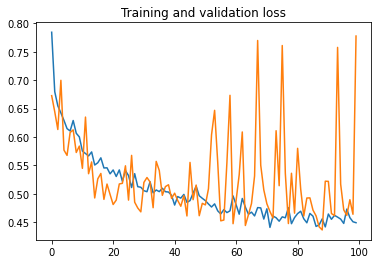

In [9]:
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [10]:
from tensorflow.keras.preprocessing import image
import numpy as np

test = os.path.join(base_dir, 'test')
for dirpath, dirs, files in os.walk(test):
    files.sort()
    for filename in files:
        test_path = os.path.join(dirpath, filename)
        img = image.load_img(test_path, target_size=(150, 150))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)

        images = np.vstack([x])
        classes = model.predict(images, batch_size=10)
        if classes[0]>0:
            print(filename + " is a dog")
        else:
            print(filename + " is a cat")        
